<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Log Rank Test for Survival Analysis
</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/log-rank-test-for-survival-analysis-d83ed78e426a

In [ ]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, statistics
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)  # For reproducibility

# Number of patients in each group
n_patients = 50

# Generate recovery times (days)
recovery_times_A = np.random.exponential(scale=10, size=n_patients)  # Drug A
recovery_times_B = np.random.exponential(scale=15, size=n_patients)  # Drug B

# Generate event observed (1 for recovery, 0 for censored)
# Assume some patients do not recover within the study period
event_A = np.random.binomial(1, 0.8, size=n_patients)  # 80% recovery rate for Drug A
event_B = np.random.binomial(1, 0.7, size=n_patients)  # 70% recovery rate for Drug B

# Combine into a DataFrame
data = {
    'time': np.concatenate([recovery_times_A, recovery_times_B]),
    'event': np.concatenate([event_A, event_B]),
    'group': ['A'] * n_patients + ['B'] * n_patients
}

df = pd.DataFrame(data)
df.head()

,time,event,group
0,4.692681,1,A
1,30.101214,1,A
2,13.167457,1,A
3,9.129426,1,A
4,1.696249,0,A


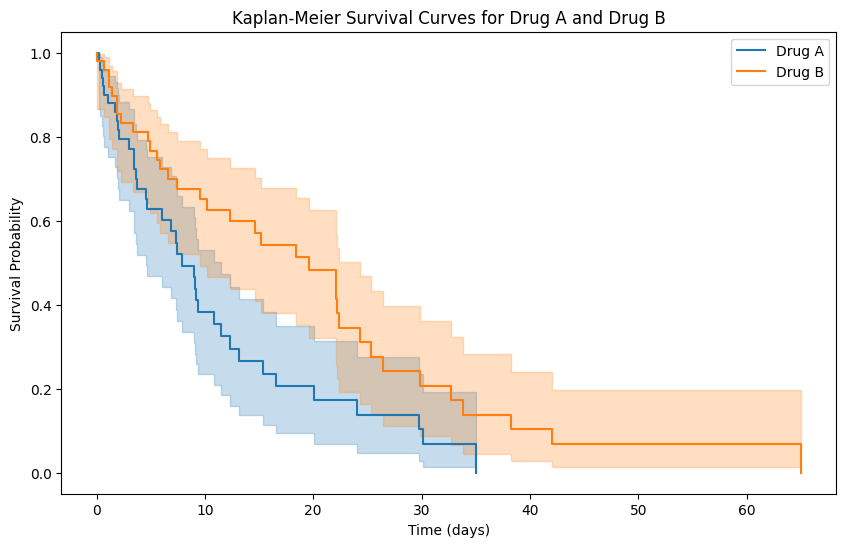

Log-Rank Test Statistic: 6.41
P-value: 0.0113


In [3]:
# Kaplan-Meier Fitting
kmf = KaplanMeierFitter()

# Plotting survival curves
plt.figure(figsize=(10, 6))

for group in df['group'].unique():
    kmf.fit(durations=df[df['group'] == group]['time'], event_observed=df[df['group'] == group]['event'], label=f'Drug {group}')
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves for Drug A and Drug B')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Log-Rank Test
results = statistics.logrank_test(
    df[df['group'] == 'A']['time'],
    df[df['group'] == 'B']['time'],
    event_observed_A=df[df['group'] == 'A']['event'],
    event_observed_B=df[df['group'] == 'B']['event']
)

print(f"Log-Rank Test Statistic: {results.test_statistic:.2f}")
print(f"P-value: {results.p_value:.4f}")


In [5]:
# Calculate summary statistics
summary_A = df[df['group'] == 'A']['time'].describe()
summary_B = df[df['group'] == 'B']['time'].describe()

# Create a DataFrame to hold the results
summary_df = pd.DataFrame({
    'Drug': ['A', 'B'],
    'Min': [summary_A['min'], summary_B['min']],
    'Max': [summary_A['max'], summary_B['max']],
    'Median': [summary_A['50%'], summary_B['50%']]
})

summary_df

,Drug,Min,Max,Median
0,A,0.207993,35.035575,5.728140
1,B,0.083061,65.012195,10.653702
